# Diffraction pattern of a hydrated molecule

In [1]:
%matplotlib inline

In [2]:
# let's set a size for some of the figures below
figsize=(4,3)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pysingfel as ps

## Inputs and parameters

In [4]:
input_dir='../input'
pdbfile=input_dir+'/pdb/2cex.pdb'
beamfile=input_dir+'/beam/amo86615.beam'
geom=input_dir+'/lcls/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data'

## Definition of the beam, the detector and the hydrated particle

### Beam
We illustrate below how to define the beam, retrieve its flux and change it eventually

In [5]:
beam = ps.Beam(beamfile)

In [6]:
increase_factor = 1e2
print('BEFORE: # of photons per pulse {}'.format(beam.get_photons_per_pulse()))
print('>>> Increasing the number of photons per pulse by a factor {}'.format(increase_factor))
beam.set_photons_per_pulse(increase_factor * beam.get_photons_per_pulse())
print('AFTER : # of photons per pulse {}'.format(beam.get_photons_per_pulse()))

BEFORE: # of photons per pulse 1e+12
>>> Increasing the number of photons per pulse by a factor 100.0
AFTER : # of photons per pulse 1e+14


### Detector
We illustrate below how to define the detector, and change its distance to the sample

In [7]:
det = ps.PnccdDetector(geom=geom, beam=beam)

In [8]:
increase_factor = 0.5
print('BEFORE: Detector distance {} m'.format(det.distance))
print('>>> Increasing the distance by a factor {}'.format(increase_factor))
det.distance = increase_factor * det.distance
print('AFTER : Detector distance {} m'.format(det.distance))

BEFORE: Detector distance 0.581 m
>>> Increasing the distance by a factor 0.5
AFTER : Detector distance 0.2905 m


### Particle
We illustrate below how to build a particle from a PDB file and then hydrate it

In [9]:
particle = ps.Particle()
particle.read_pdb(pdbfile, ff='WK')
print('Number of atoms in particle: {}'.format(particle.get_num_atoms()))

('Unknown element or wrong line: \n', 'HETATM 2364 ZN    ZN A1306      16.516   1.920  -2.897  0.50 39.31          ZN  \n')
no symmetry REMARK 350 found
Number of atoms in particle: 2451


In [10]:
hydration_layer_thickness = 6.0 / 10**10
mesh_voxel_size           = 2.0 / 10**10
print('Hydration layer: [ {} m (thickness) ] [ {} m (mesh voxel size) ]'.format(hydration_layer_thickness,mesh_voxel_size))

Hydration layer: [ 6e-10 m (thickness) ] [ 2e-10 m (mesh voxel size) ]


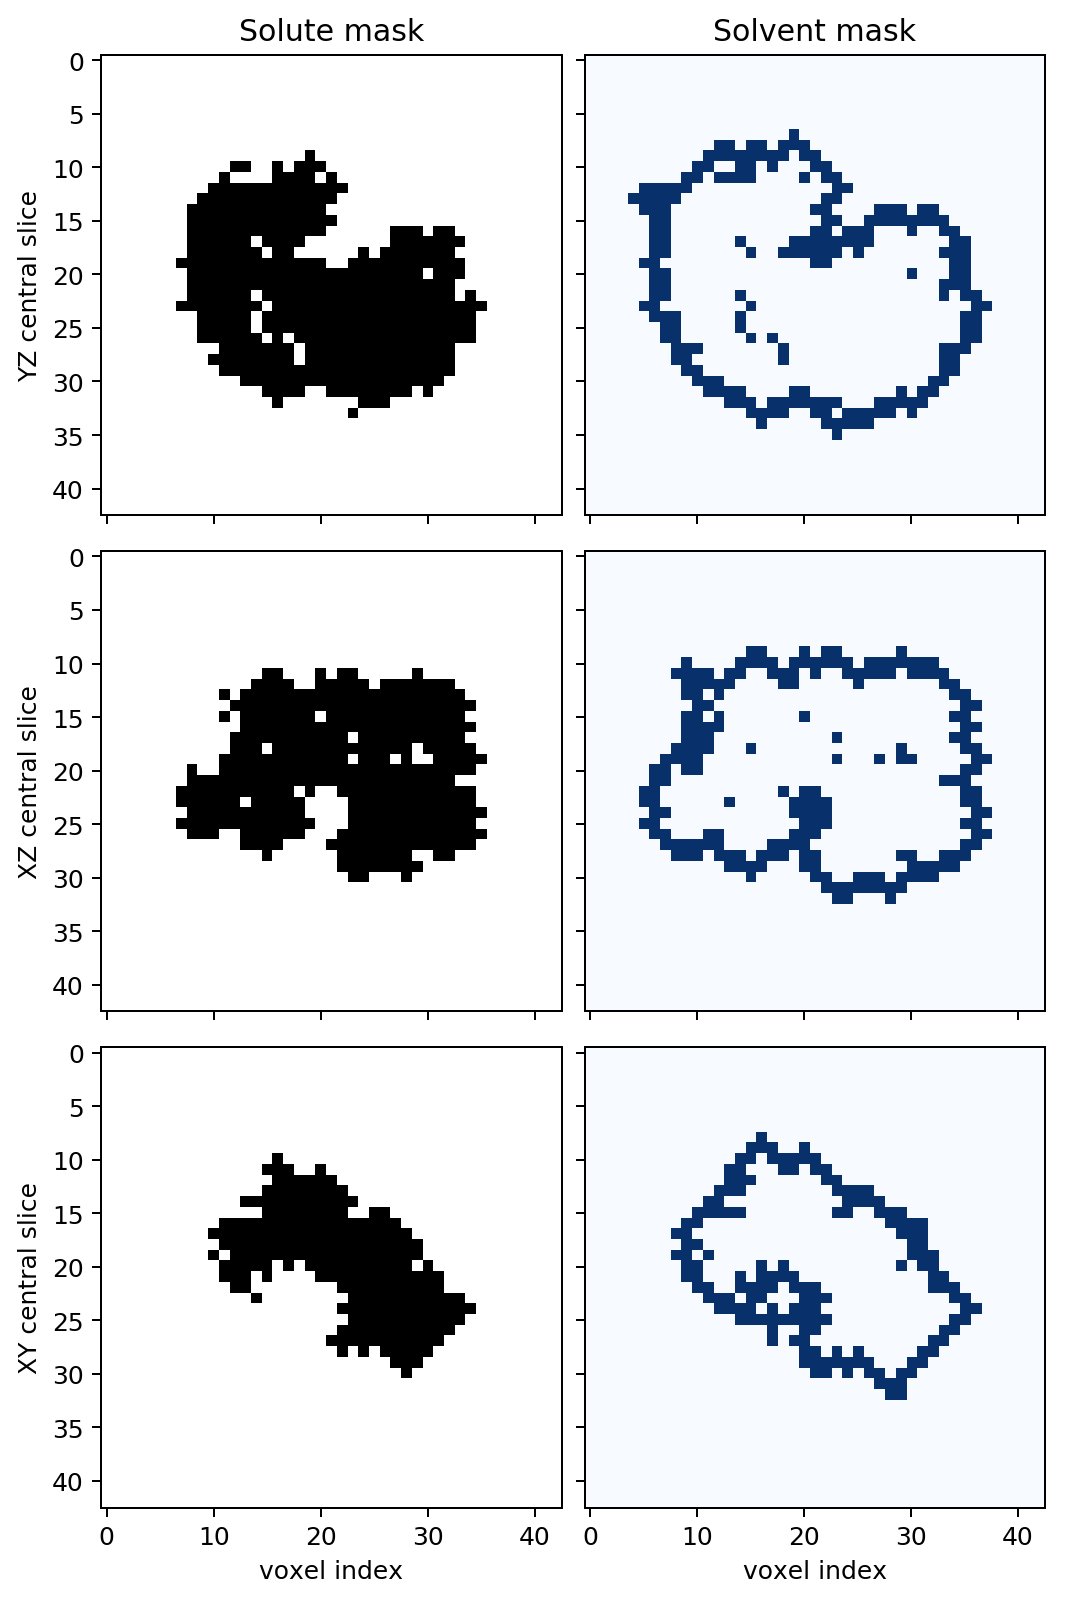

In [11]:
particle.set_hydration_layer_thickness(hydration_layer_thickness)
particle.set_mesh_voxel_size(mesh_voxel_size)
particle.create_masks()
ps.ShowMasks(particle)

## perform SPI Experiment
Let's generate a diffraction pattern of the hydrated object and visualize it

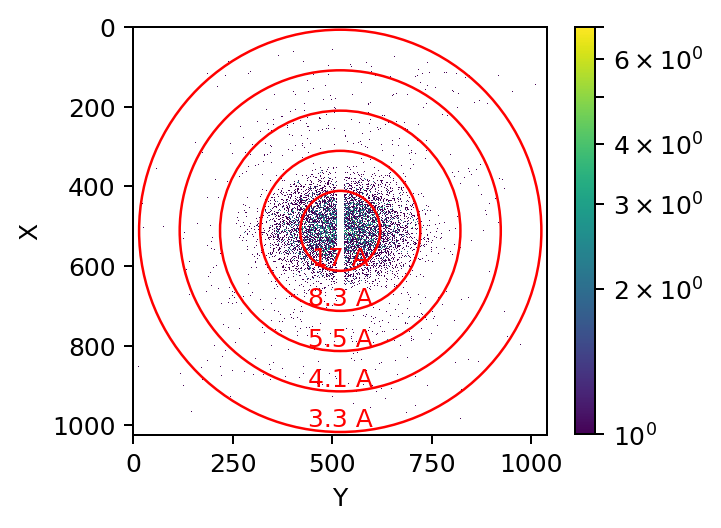

In [12]:
experiment = ps.SPIExperiment(det, beam, particle)
image = experiment.generate_image()
#
fig = plt.figure(figsize=figsize, dpi=180)
viz = ps.Visualizer(experiment, diffraction_rings="auto", log_scale=True)
viz.imshow(image)

To get a better idea of the effect of the hydration layer, let's fix the orientation of the diffraction pattern, and generate for 3 different hydration layers:

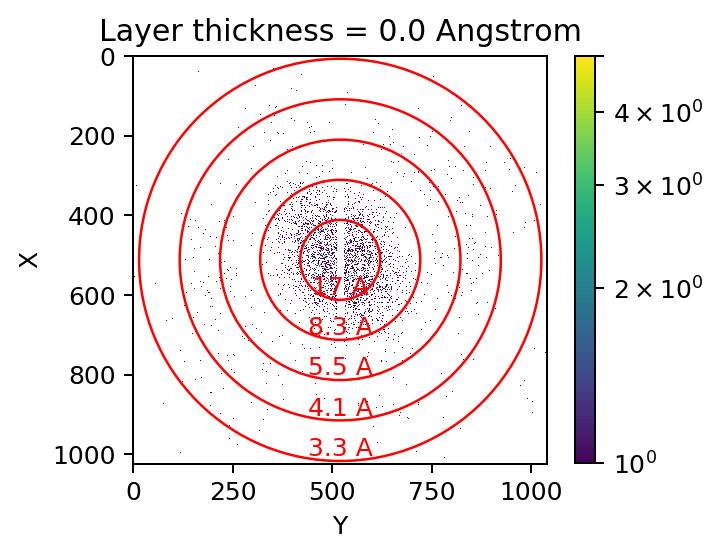

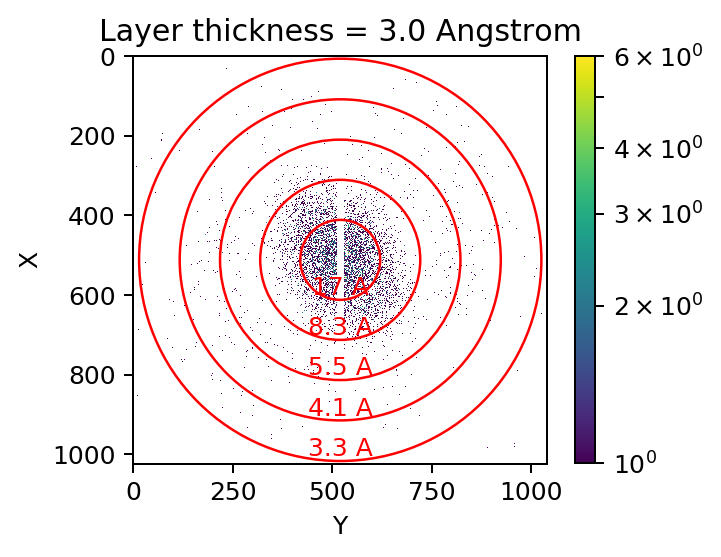

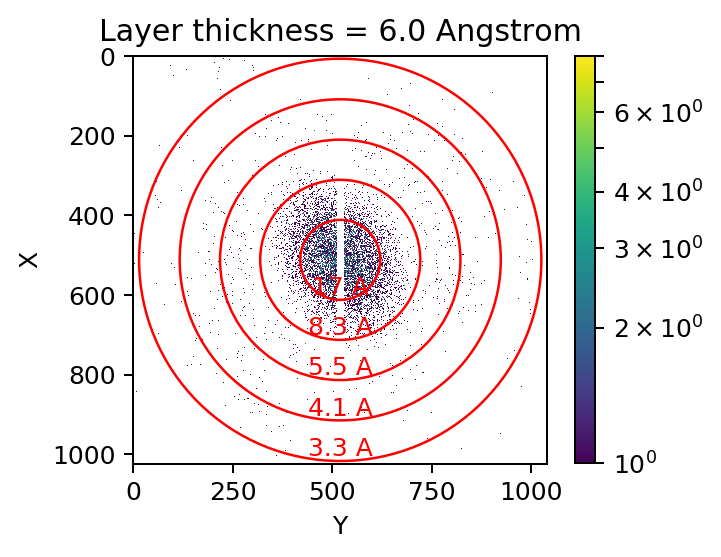

In [13]:
orientation = None 
for thickness in [0., 3., 6.]:
    hydration_layer_thickness = thickness / 10**10
    mesh_voxel_size           = 2.0 / 10**10
    particle.set_hydration_layer_thickness(hydration_layer_thickness)
    particle.create_masks()
    experiment = ps.SPIExperiment(det, beam, particle, orientations=orientation)
    if orientation is None:
        image, orientation = experiment.generate_image(return_orientation=True)
    else:
        image = experiment.generate_image()
    viz = ps.Visualizer(experiment, diffraction_rings="auto", log_scale=True)
    fig = plt.figure(figsize=figsize, dpi=180)
    plt.title('Layer thickness = {} Angstrom'.format(thickness))
    viz.imshow(image)

## Illustrate with SAXS profile

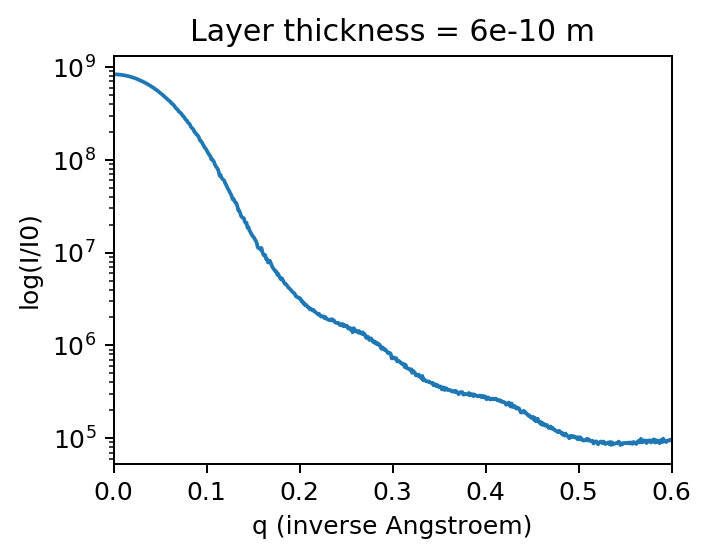

In [14]:
N = 1000000
qmax = 6e9
particle.set_hydration_layer_thickness(hydration_layer_thickness)
saxs_profile = ps.SAXS(particle, N, qmax)
fig = plt.figure(figsize=figsize,dpi=180)
plt.title('Layer thickness = {} m'.format(hydration_layer_thickness))
saxs_profile.plot()

Let's see what that profile would have looked like without a hydration layer

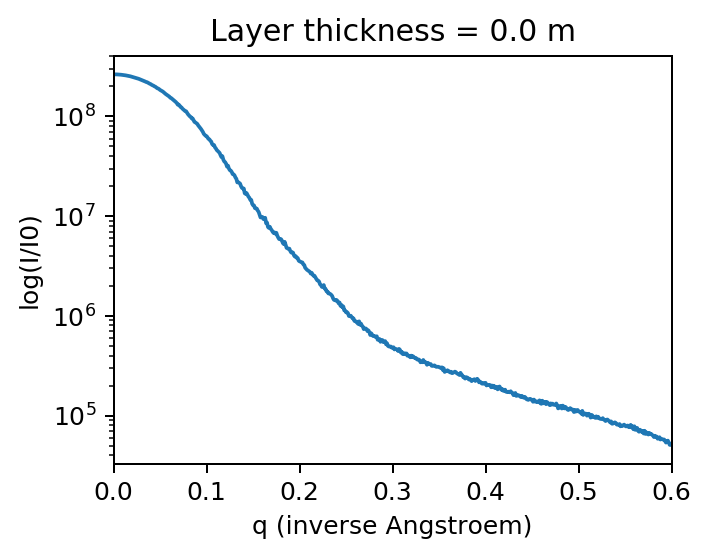

In [15]:
particle.set_hydration_layer_thickness(0.)
particle.get_masks()
saxs_profile = ps.SAXS(particle, N, qmax)
fig = plt.figure(figsize=figsize,dpi=180)
plt.title('Layer thickness = {} m'.format(0.))
saxs_profile.plot()